In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV

In [22]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("/content/drive/MyDrive/diplomado/aprendizaje_supervizado/bank_marketing_RETO_DS_AS.csv")

In [168]:
data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [170]:
columnascategoricas = ['job', 'poutcome', 'contact','education', 'month']
encondercartegorico = OneHotEncoder().fit(data[columnascategoricas])
dataenc=encondercartegorico.transform(data[columnascategoricas]).toarray()

columnas_expandidas = [f"categoricas_{col}" for col in encondercartegorico.get_feature_names_out(columnascategoricas)]

encondercartegorico_df = pd.DataFrame(dataenc, columns=columnas_expandidas)

data = pd.concat([data.drop(columns=columnascategoricas), encondercartegorico_df], axis=1)
data

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,categoricas_job_admin.,categoricas_job_blue-collar,categoricas_job_entrepreneur,categoricas_job_housemaid,categoricas_job_management,categoricas_job_retired,categoricas_job_self-employed,categoricas_job_services,categoricas_job_student,categoricas_job_technician,categoricas_job_unemployed,categoricas_job_unknown,categoricas_poutcome_failure,categoricas_poutcome_other,categoricas_poutcome_success,categoricas_poutcome_unknown,categoricas_contact_cellular,categoricas_contact_telephone,categoricas_contact_unknown,categoricas_education_primary,categoricas_education_secondary,categoricas_education_tertiary,categoricas_education_unknown,categoricas_month_apr,categoricas_month_aug,categoricas_month_dec,categoricas_month_feb,categoricas_month_jan,categoricas_month_jul,categoricas_month_jun,categoricas_month_mar,categoricas_month_may,categoricas_month_nov,categoricas_month_oct,categoricas_month_sep
0,31,married,no,2666,no,no,10,318,2,97,6,yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,29,single,no,1584,no,no,6,245,1,-1,0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,married,no,2152,yes,no,17,369,1,-1,0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,50,married,no,84,yes,no,17,18,8,-1,0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40,married,no,0,no,no,28,496,2,182,11,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,42,married,no,314,yes,yes,16,269,2,-1,0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8996,32,married,no,491,yes,no,8,223,2,-1,0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8997,44,single,no,2886,no,no,20,31,1,-1,0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8998,57,married,no,491,yes,no,15,1217,3,-1,0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
columnascategoricas1 = ['marital','y','housing','loan','default']
label_encoder = LabelEncoder()

for col in columnascategoricas1:
    data[col] = label_encoder.fit_transform(data[col])
data

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,categoricas_job_admin.,categoricas_job_blue-collar,categoricas_job_entrepreneur,categoricas_job_housemaid,categoricas_job_management,categoricas_job_retired,categoricas_job_self-employed,categoricas_job_services,categoricas_job_student,categoricas_job_technician,categoricas_job_unemployed,categoricas_job_unknown,categoricas_poutcome_failure,categoricas_poutcome_other,categoricas_poutcome_success,categoricas_poutcome_unknown,categoricas_contact_cellular,categoricas_contact_telephone,categoricas_contact_unknown,categoricas_education_primary,categoricas_education_secondary,categoricas_education_tertiary,categoricas_education_unknown,categoricas_month_apr,categoricas_month_aug,categoricas_month_dec,categoricas_month_feb,categoricas_month_jan,categoricas_month_jul,categoricas_month_jun,categoricas_month_mar,categoricas_month_may,categoricas_month_nov,categoricas_month_oct,categoricas_month_sep
0,31,1,0,2666,0,0,10,318,2,97,6,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,29,2,0,1584,0,0,6,245,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1,0,2152,1,0,17,369,1,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,50,1,0,84,1,0,17,18,8,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40,1,0,0,0,0,28,496,2,182,11,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,42,1,0,314,1,1,16,269,2,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8996,32,1,0,491,1,0,8,223,2,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8997,44,2,0,2886,0,0,20,31,1,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8998,57,1,0,491,1,0,15,1217,3,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


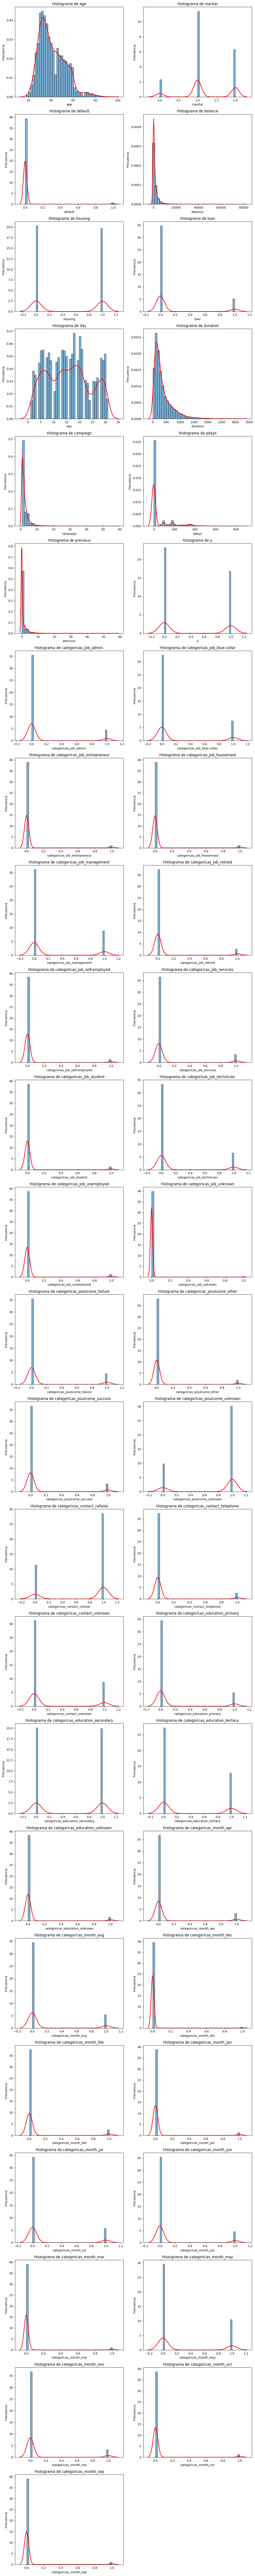

In [172]:
num_cols = data.shape[1]
num_rows = math.ceil(num_cols / 2)

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 5 * num_rows))

axes = axes.flatten()

for i, column in enumerate(data.columns):
    axes[i].hist(data[column], bins=40, edgecolor='black', density=True, alpha=0.6)
    sns.kdeplot(data[column], ax=axes[i], color='red', linewidth=2)

    axes[i].set_title(f'Histograma de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia ')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [173]:
def fun1(X, col_name):
    prom = data[col_name].mean()
    return np.log(np.where((X == -1) | (X == 0), prom, X) + 1)

In [174]:
sesgopositivo=['age','duration','pdays','campaign']
for col in sesgopositivo:
    data[col] = data[col].apply(lambda x: fun1(x, col))
data

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,categoricas_job_admin.,categoricas_job_blue-collar,categoricas_job_entrepreneur,categoricas_job_housemaid,categoricas_job_management,categoricas_job_retired,categoricas_job_self-employed,categoricas_job_services,categoricas_job_student,categoricas_job_technician,categoricas_job_unemployed,categoricas_job_unknown,categoricas_poutcome_failure,categoricas_poutcome_other,categoricas_poutcome_success,categoricas_poutcome_unknown,categoricas_contact_cellular,categoricas_contact_telephone,categoricas_contact_unknown,categoricas_education_primary,categoricas_education_secondary,categoricas_education_tertiary,categoricas_education_unknown,categoricas_month_apr,categoricas_month_aug,categoricas_month_dec,categoricas_month_feb,categoricas_month_jan,categoricas_month_jul,categoricas_month_jun,categoricas_month_mar,categoricas_month_may,categoricas_month_nov,categoricas_month_oct,categoricas_month_sep
0,3.465736,1,0,2666,0,0,10,5.765191,1.098612,4.584967,6,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.401197,2,0,1584,0,0,6,5.505332,0.693147,3.941802,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.737670,1,0,2152,1,0,17,5.913503,0.693147,3.941802,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.931826,1,0,84,1,0,17,2.944439,2.197225,3.941802,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.713572,1,0,0,0,0,28,6.208590,1.098612,5.209486,11,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,3.761200,1,0,314,1,1,16,5.598422,1.098612,3.941802,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8996,3.496508,1,0,491,1,0,8,5.411646,1.098612,3.941802,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8997,3.806662,2,0,2886,0,0,20,3.465736,0.693147,3.941802,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8998,4.060443,1,0,491,1,0,15,7.104965,1.386294,3.941802,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


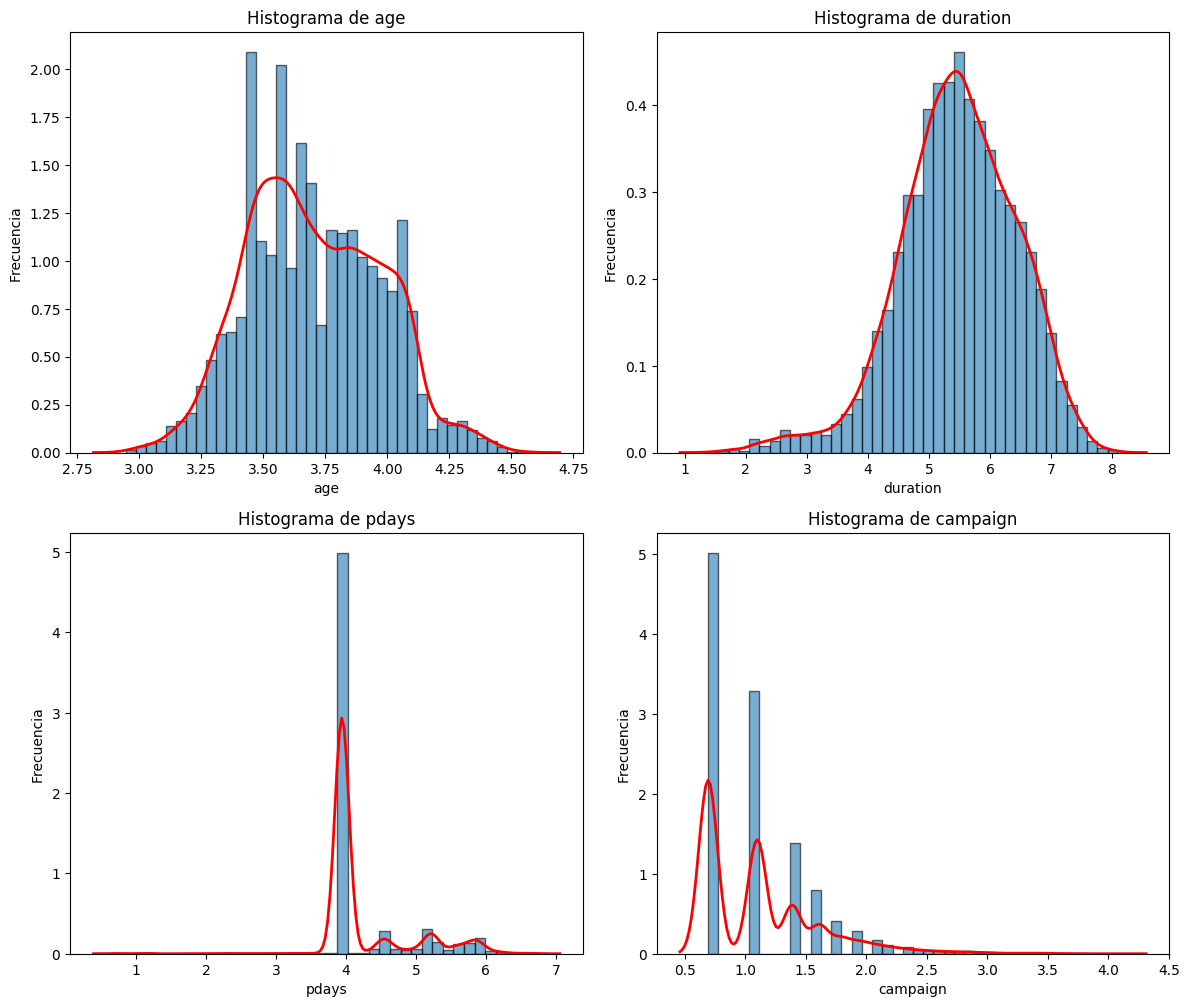

In [175]:

num_cols = data.shape[1]
num_rows = math.ceil(num_cols / 2)

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 5 * num_rows))
axes = axes.flatten()
for i, column in enumerate(sesgopositivo):

    axes[i].hist(data[column], bins=40, edgecolor='black', density=True, alpha=0.6)

    sns.kdeplot(data[column], ax=axes[i], color='red', linewidth=2)

    axes[i].set_title(f'Histograma de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia ')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [176]:
y = data['y']
x = data.drop(columns=['y'])

In [177]:
X = x.values
Y = y.values

In [178]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4,random_state=24)

In [179]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,random_state=24)  # 20% validación y 20% prueba


In [180]:
print("Dimensión X_train_set:\t\t", X_train.shape)
print("Dimensión X_validation_set:\t", X_val.shape)
print("Dimension X_test_set:\t\t", X_test.shape)

print("\nDimensión Y_train:\t\t", y_train.shape)
print("Dimensión Y_validation:\t\t", y_val.shape)
print("Dimensión Y_test:\t\t", y_test.shape)

Dimensión X_train_set:		 (5400, 46)
Dimensión X_validation_set:	 (1800, 46)
Dimension X_test_set:		 (1800, 46)

Dimensión Y_train:		 (5400,)
Dimensión Y_validation:		 (1800,)
Dimensión Y_test:		 (1800,)


In [206]:
clf = LogisticRegression( C=1.0, solver='lbfgs',random_state=5, max_iter=5 )
modelo_RL = clf.fit( X_train, y_train )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [207]:
yvalpred = modelo_RL.predict(X_train)

In [208]:
print("Exactitud (accuracy) con el conjunto de Validación = ", modelo_RL.score(X_train, y_train))

Exactitud (accuracy) con el conjunto de Validación =  0.517962962962963


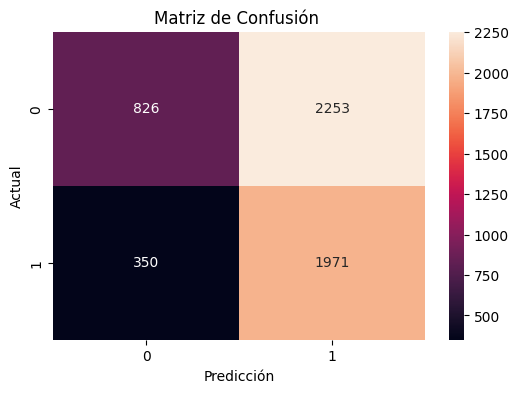

In [210]:
conf_matrix = confusion_matrix(y_train, yvalpred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión ')
plt.show()


In [137]:
clf1= LogisticRegression( C=1.0, solver='lbfgs',random_state=24, max_iter=1000 )
modelo_RL1= clf1.fit( X_train, y_train )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [211]:
yvalpred1 = modelo_RL1.predict(X_train)

In [212]:
print("Exactitud (accuracy) con el conjunto de Validación = ", modelo_RL1.score(X_train, y_train))

Exactitud (accuracy) con el conjunto de Validación =  0.8242592592592592


In [213]:
nn_model = MLPClassifier(hidden_layer_sizes=(6,4), random_state=11, max_iter=1000)
nn_model.fit(X_train, y_train)

yvalprednn = nn_model.predict(X_train)

In [214]:
print("Exactitud (accuracy) con el conjunto de Validación = ", nn_model.score(X_train, y_train))

Exactitud (accuracy) con el conjunto de Validación =  0.5703703703703704


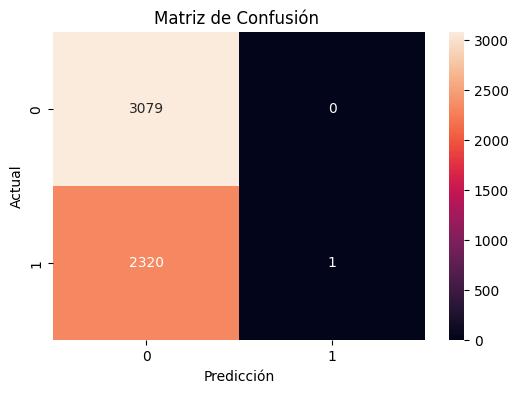

In [216]:
conf_matrixnn = confusion_matrix(y_train, yvalprednn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrixnn, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión ')
plt.show()



In [217]:

nn_model1 = MLPClassifier(hidden_layer_sizes=(5,3), random_state=24, max_iter=5000)
nn_model1.fit(X_train, y_train)

yvalprednn1 = nn_model1.predict(X_train)

In [218]:
print("Exactitud (accuracy) con el conjunto de Validación = ", nn_model1.score(X_train, y_train))

Exactitud (accuracy) con el conjunto de Validación =  0.8011111111111111


In [219]:
clffin= LogisticRegression( C=1.0, solver='lbfgs',random_state=24, max_iter=1000 )
modelo_RLfin= clffin.fit( X_train, y_train )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [220]:
yvalpredfin = modelo_RLfin.predict(X_test)

In [221]:
print("Exactitud (accuracy) con el conjunto de Validación = ", nn_model.score(X_test, y_test))

Exactitud (accuracy) con el conjunto de Validación =  0.6061111111111112


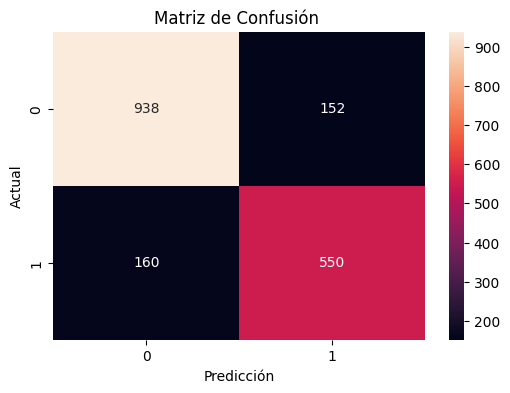

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1090
           1       0.78      0.77      0.78       710

    accuracy                           0.83      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.83      0.83      0.83      1800



In [222]:
conf_matrixfin = confusion_matrix(y_test, yvalpredfin)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrixfin, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión ')
plt.show()

print("Reporte de Clasificación:")
print(classification_report(y_test, yvalpredfin))